# Практическая работа №3

## Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

## 1. Построение распределений 

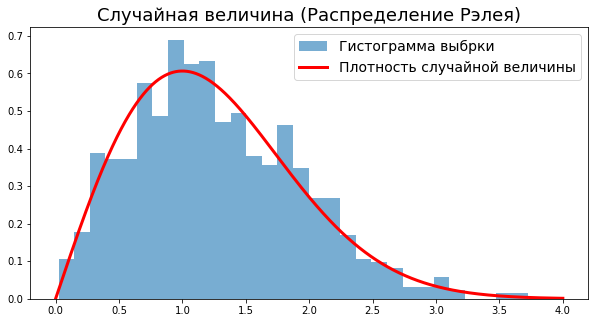

In [13]:
X = sps.rayleigh
sample = X.rvs(size = 1000)
grid = np.linspace(0, 4, 1000)
plt.figure(figsize=(10, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выбрки')
plt.plot(grid, X.pdf(grid), color='r', lw=3, label='Плотность случайной величины')
plt.title('Случайная величина (Распределение Рэлея)', fontsize=18)
plt.legend(fontsize=14)
plt.show()

## 2. Построение графика по функции

Решим уравнение и получим его корни:

Перенесем $x^2y^34$ вправо:

$
(x^2 + y^2 – 1)^3 = x^2y^3   
$

Извлекаем из кубического корня обе части уравнения:

$
\sqrt[3]{(x^2 + y^2 – 1)^3} = \sqrt[3]{x^2y^3}
$

$
x^2 + y^2 – 1 = x^{2/3}y
$

Переносим $x^{2/3}y$ влево:

$
y^2 - x^{2/3}y + x^2 - 1 = 0 
$

Находим дискриминант:

$
D = b^2 – 4ac = (-x^{2/3})^2 – 4*1*(x^2-1) = x^{4/3} – 4x^2 + 4
$

Корнями уравнения будут:

$
y = \frac{(-x)^{2/3}±\sqrt{x^{4/3}-4x^2+4}}{2}
$

Используем их для построения графика.

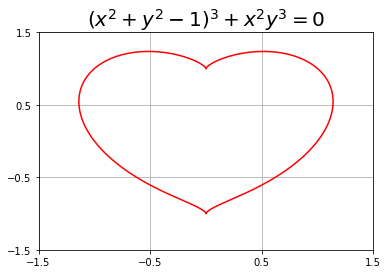

In [8]:
plt.title(r'$(x^2+y^2-1)^3+x^2y^3=0$', fontsize=20)
x = np.arange(-10, 10, 0.001)
#y = np.arange(100, -100, 0.0001)
# Разделим функцию на две части
m = np.sqrt(np.power(-1*x, 4/3) - (4*np.square(-1*x)) + 4)
k = np.sqrt(np.power(x, 4/3) - (4*np.square(x)) + 4)
#np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*(np.power(-x, 2/3) + m)
y2 = 0.5*(np.power(-x, 2/3) - m)
y3 = 0.5*(np.power(x, 2/3) + k)
y4 = 0.5*(np.power(x, 2/3) - k)
# Установить масштаб и интервал координат по оси x и оси y
# Это не будет выглядеть хорошо, если вы не установите его самостоятельно
my_x_ticks = np.arange(-1.5, 2.5)
my_y_ticks = np.arange(-1.5, 2.5)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='r')
plt.plot(x, y4, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

Ниже дополнительно еще один вариант графика в форме сердца, но по другой формуле:

$y = \frac{1}{2}|x|±\sqrt{1-\frac{3}{4}x^2}$

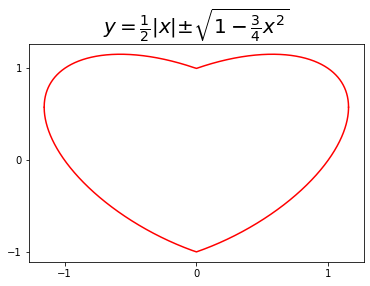

In [10]:
plt.title(r'$y = \frac{1}{2}|x|±\sqrt{1-\frac{3}{4}x^2}$', fontsize=20)
x = np.arange(-100, 100, 0.0001)
m = np.sqrt(1-(3/4*np.square(x)))
y1 = 0.5*np.abs(x) + m
y2 = 0.5*np.abs(x) - m
my_x_ticks = np.arange(-1, 2)
my_y_ticks = np.arange(-1, 2)
plt.plot(x, y1, color='r')
plt.plot(x, y2, color='r')
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

## 3. Датасет

In [5]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

In [6]:
with open('./dataset_home.txt', 'r') as file:
    for human in file.readlines():
        
        age.append(int(human.split(',')[0]))
       
        if human.split(',')[1] == 'male':
            sex.append(1)
        else:
            sex.append(0)
        
        bmi.append(float(human.split(',')[2]))
        children.append(int(human.split(',')[3]))
        
        if human.split(',')[4] == 'yes':
            smoker.append(1)
        else:
            smoker.append(0)
            
        if human.split(',')[5] == 'northwest':
            region.append(0)
        elif human.split(',')[5] == 'northeast':
            region.append(1)
        elif human.split(',')[5] == 'southwest':
            region.append(2)
        elif human.split(',')[5] == 'southeast':
            region.append(3)
        else:
            region.append(human.split(',')[5])
            
        charges.append(float(human.split(',')[6]))
        

In [7]:
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charges = np.array(charges)

### Возраст (age)

In [8]:
print(f'Минимальный возраст в выборке: {age.min()}')
print(f'Максимальный возраст в выборке: {age.max()}')
print(f'Средний возраст в выборке: {round(age.mean())}')

Минимальный возраст в выборке: 18
Максимальный возраст в выборке: 64
Средний возраст в выборке: 38


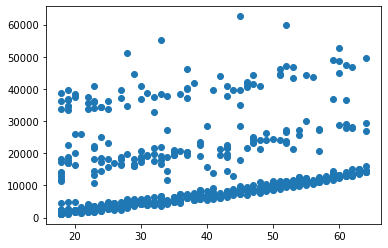

In [51]:
plt.scatter(age, charges)

На основании графика можно говорить о том, что увеличением возраста затраты на страховые взносы также растут.

In [110]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(age, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.25


Коэффициент корреляции указывает на слабую положительную линейную зависимость между возрастом и уровнем затрат на страховку.

In [17]:
# Выделение возрастных групп
age[age<36].shape, age[age>35][age[age>35]<56].shape, age[age>55].shape

((307,), (269,), (94,))

Поколение людей в возрасте от 55 лет в меньшинстве. В основном, выборка представлена молодыми людьми и людьми среднего возраста.

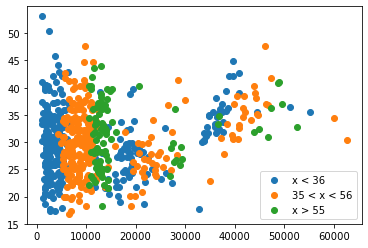

In [106]:
plt.scatter(charges[age<36], bmi[age<36], label='x < 36')
plt.scatter(charges[age>35][age[age>35]<56], bmi[age>35][age[age>35]<56], label='35 < x < 56')
plt.scatter(charges[age>55], bmi[age>55], label='x > 55')
plt.legend()
plt.show()

Люди средней возрастной группы и старшего поколения тратят на страховку больше денег, чем молодое поколение.

### Индекс массы тела (bmi)

In [30]:
print(f'Минимальный индекс массы тела в выборке: {round(bmi.min(), 2)}')
print(f'Максимальный индекс массы тела в выборке: {round(bmi.max(), 2)}')
print(f'Средний индекс массы тела в выборке: {round(bmi.mean(), 2)}')

Минимальный индекс массы тела в выборке: 16.82
Максимальный индекс массы тела в выборке: 53.13
Средний индекс массы тела в выборке: 30.21


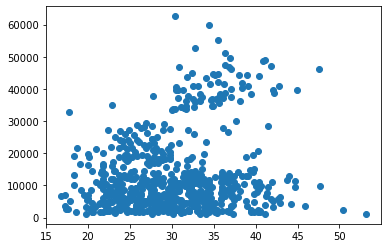

In [52]:
plt.scatter(bmi, charges)

(array([ 17.,  55., 100., 124., 119., 116.,  72.,  38.,  20.,   5.,   2.,
          2.]),
 array([16.815  , 19.84125, 22.8675 , 25.89375, 28.92   , 31.94625,
        34.9725 , 37.99875, 41.025  , 44.05125, 47.0775 , 50.10375,
        53.13   ]),
 <BarContainer object of 12 artists>)

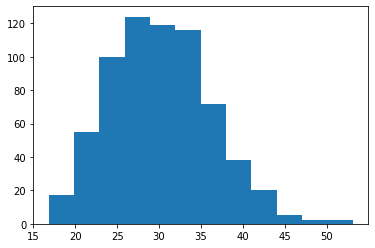

In [117]:
plt.hist(bmi, bins=12)

Куполообразная форма графика вполне соответствует нормальному распределению. Есть незначительная скошенность данных вправо.

In [16]:
# Выделение групп по индексу массы тела
bmi[bmi<=23].shape, bmi[bmi>23][bmi[bmi>23]<=38].shape, bmi[bmi>38].shape

((77,), (526,), (67,))

In [71]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(bmi, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.19


На основании коэффициента корреляции можно говорить об очень слабой положительной линейной зависимости.

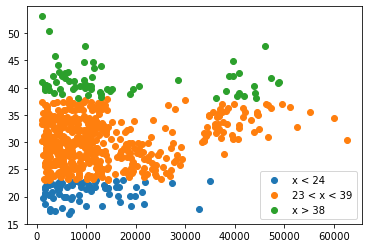

In [135]:
plt.scatter(charges[bmi<=23], bmi[bmi<=23], label='x < 24')
plt.scatter(charges[bmi>23][bmi[bmi>23]<=38], bmi[bmi>23][bmi[bmi>23]<=38], label='23 < x < 39')
plt.scatter(charges[bmi>38], bmi[bmi>38], label='x > 38')
plt.legend()
plt.show()

Люди со средним индексом массы тела и с индексом выше среднего тратят на страховые взносы больше денег, чем люди с низким индексом массы тела.

### Количество детей (children)

In [29]:
print(f'Минимальное количество детей у людей из выборки: {round(children.min())}')
print(f'Максимальное количество детей у людей из выборки: {round(children.max())}')
print(f'Среднее количество детей у людей из выборки: {round(children.mean())}')

Минимальное количество детей у людей из выборки: 0
Максимальное количество детей у людей из выборки: 5
Среднее количество детей у людей из выборки: 1


(array([291.,   0., 155.,   0., 117.,   0.,  85.,   0.,  13.,   9.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

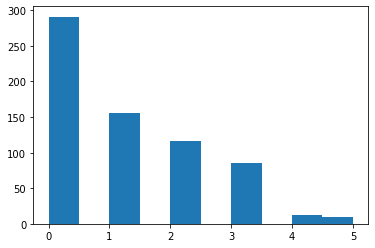

In [12]:
plt.hist(children)

In [14]:
children[children==0].shape, children[children>0][children[children>0]<4].shape, children[children>3].shape

((291,), (357,), (22,))

Большинство людей, представленных в выборке имеют от 1 до 3 детей. Меньшинство от 4 до 5. Среднее  положение занимают люди не имеющие детей.

In [83]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(children, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.06


Коэффициент корреляции является положительным, но указывает на практически отсутствующую взаимосвязь между признаками.

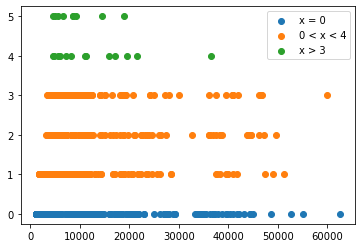

In [15]:
plt.scatter(charges[children==0], children[children==0], label='x = 0')
plt.scatter(charges[children>0][children[children>0]<4], children[children>0][children[children>0]<4], label='0 < x < 4')
plt.scatter(charges[children>3], children[children>3], label='x > 3')
plt.legend()
plt.show()

По графикам видно, что наибольшие затраты на страховку у людей не имеющих детей, а наименьшие у людей с 4-5 детьми.

### Пол (sex)

In [48]:
print(f'Количество мужчин в выборке: {sex[sex==1].shape[0]}')
print(f'Количество женщин в выборке: {sex[sex==0].shape[0]}')

Количество мужчин в выборке: 334
Количество женщин в выборке: 336


Количество мужчин и женщин в выборке приблизительно одинаковое с незначительным преобладанием женщин.

<BarContainer object of 670 artists>

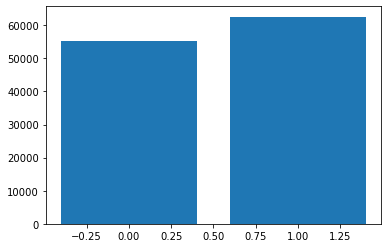

In [89]:
plt.bar(sex, charges)

График говорит о том, что мужчины вкладывают в страховку больше денег, чем женщины.

In [85]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(sex, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.02


Также как и с детьми, здесь коэффициент корреляцие положителен, но указывает на отсутствие взаимосвязи между полом и затратами на страховку.

### Курящие (smoker)

In [18]:
print(f'Количество курящих в выборке: {smoker[smoker==1].shape[0]}')
print(f'Количество некурящих в выборке: {smoker[smoker==0].shape[0]}')

Количество курящих в выборке: 138
Количество некурящих в выборке: 532


Некурящие преобладают в выборке.

<BarContainer object of 670 artists>

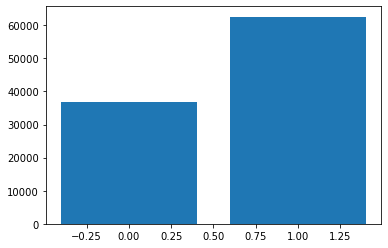

In [90]:
plt.bar(smoker, charges)

Курящие тратят больше на страховку по сравнению с некурящими.

In [86]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(smoker, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.79


Суду по коэффициенту корреляции прослеживается сильная положительная зависимость между признаком указывающем на курение/не курение и затратами на страховку.

### Регион (region)

In [47]:
print(f'Количество людей в выборке с северо-запада: {region[region==0].shape[0]}')
print(f'Количество людей в выборке с северо-востока: {region[region==1].shape[0]}')
print(f'Количество людей в выборке с юго-запада: {region[region==2].shape[0]}')
print(f'Количество людей в выборке с юго-востока: {region[region==3].shape[0]}')

Количество людей в выборке с северо-запада: 176
Количество людей в выборке с северо-востока: 161
Количество людей в выборке с юго-запада: 166
Количество людей в выборке с юго-востока: 167


<BarContainer object of 670 artists>

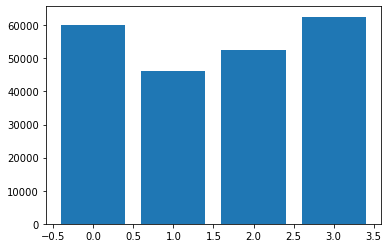

In [92]:
plt.bar(region, charges)

График говорит о том, что жители юго-востока и северо-запада тратят больше денег на страховые взносы, чем жители юго-запада и северо-востока. При этом максимальные затраты у жителей юго-востока, а минимальные у жителей северо-востока.

In [87]:
print(f'Коэффициент корреляции Пирсона = {round(np.corrcoef(region, charges)[0][1], 2)}')

Коэффициент корреляции Пирсона = 0.08


Коэффициент корреляции указывает на отсутствие явной связи между признаками.

### Затраты на страховку (charges)

In [49]:
print(f'Минимальный размер денежных затрат на страхование: {round(charges.min(), 2)}')
print(f'Максимальный размер денежных затрат на страхование: {round(charges.max(), 2)}')
print(f'Средний размер денежных затрат на страхование: {round(charges.mean(), 2)}')

Минимальный размер денежных затрат на страхование: 1131.51
Максимальный размер денежных затрат на страхование: 62592.87
Средний размер денежных затрат на страхование: 12899.87


(array([136., 142.,  93.,  95.,  39.,  35.,  24.,  14.,  15.,   4.,  11.,
         18.,  17.,   7.,  10.,   5.,   2.,   1.,   0.,   2.]),
 array([ 1131.5066   ,  4204.5749245,  7277.643249 , 10350.7115735,
        13423.779898 , 16496.8482225, 19569.916547 , 22642.9848715,
        25716.053196 , 28789.1215205, 31862.189845 , 34935.2581695,
        38008.326494 , 41081.3948185, 44154.463143 , 47227.5314675,
        50300.599792 , 53373.6681165, 56446.736441 , 59519.8047655,
        62592.87309  ]),
 <BarContainer object of 20 artists>)

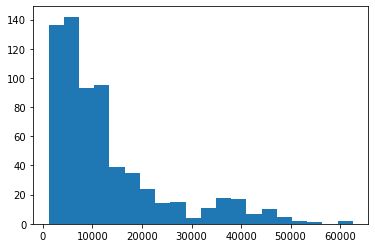

In [61]:
plt.hist(charges, bins=20)

Форма граффика сходна с распределением Пуассона. Данные скошены вправо. Есть интересная просадка данных в районе 30000. Чем она обусловлена сходу сказать трудно, возможно это некое порговое значение и есть какая-то связь с тарифными планами страховой компании.